### Кейс № 3: `Data Mining в бизнесе`.

### Постановка задачи
У телекоммуникационной компании `Всегда на связи` за последние 2 месяца повысился отток клиентов. Руководство компании поставило задачу: какие факторы влияют на вероятность того перестанет ли абонент пользоваться предложенными услугами.

В Вашем распоряжении имеется информация по 5517 абонентам. Каждый абонент характеризуется 14 показателями:

- гендерная принадлежность `gender`
- достиг ли абонент пенсионного возраста `SeniorCitizen`
- имеет ли супругу / супруга `Partner`
- продолжительность пользования услугами телекоммуникационной компании в месяцах `tenure`
- величина ежемесячных выплат `MonthlyCharges`
- имеет ли абонент детей `Dependents`
- тип подключения интернета `InternetService`

также подключение:
- блокировки небезопасных сайтов `OnlineSecurity`
- антивируса `DeviceProtection`
- технической поддержки `TechSupport`
- облачного хранилища файлов для резервного копирования данных `OnlineBackup`
- стримингового телевидения `StreamingTV`
- электронной оплаты услуг `PaperlessBilling`

Целевой бинарный признак `Churn` показывает перестал ли абонент пользоваться услугами телекоммуникационной компании.

### Задачи:

- провести исследовательский анализ данных
- представить графически переменные выборочной совокупности
- выявить факторы, которые влияют на вероятность оттока абонента

### Каждый пункт сопровождается пояснениями. В конце работы необходимо сформулировать итоговые выводы

### Шаг 1. Загрузка библиотек и массивов статистических данных

In [1]:
# загрузка необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, make_scorer
from datetime import datetime
# изменение стиля построения диаграмм
plt.style.use('ggplot')

In [2]:
# загрузка выборочной совокупности
telco = pd.read_csv('telco.csv')

### Шаг 2. Подготовка данных к моделированию

In [3]:
# вывод общей информации по выборочной совокупности
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5517 non-null   object 
 1   SeniorCitizen     5517 non-null   object 
 2   Partner           5517 non-null   object 
 3   Dependents        5517 non-null   object 
 4   tenure            5517 non-null   int64  
 5   InternetService   5517 non-null   object 
 6   OnlineSecurity    5517 non-null   object 
 7   OnlineBackup      5517 non-null   object 
 8   DeviceProtection  5517 non-null   object 
 9   TechSupport       5517 non-null   object 
 10  StreamingTV       5517 non-null   object 
 11  PaperlessBilling  5517 non-null   object 
 12  MonthlyCharges    5517 non-null   float64
 13  Churn             5517 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 603.5+ KB


- `tenure`: Number of months the customer has stayed with the company;

In [4]:
# вывод первых пяти наблюдений выборочной совокупности
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,PaperlessBilling,MonthlyCharges,Churn
0,Female,No,Yes,No,1,DSL,No,Yes,No,No,No,Yes,29.85,No
1,Male,No,No,No,34,DSL,Yes,No,Yes,No,No,No,56.95,No
2,Male,No,No,No,2,DSL,Yes,Yes,No,No,No,Yes,53.85,Yes
3,Male,No,No,No,45,DSL,Yes,No,Yes,Yes,No,No,42.30,No
4,Female,No,No,No,2,Fiber optic,No,No,No,No,No,Yes,70.70,Yes


- целевой признак: `Churn`, где `No` означает, что индивид является действующим пользователем. `Yes` индивид перестал пользоваться услугами телекоммуникационной компании.

In [5]:
# Определим количество пропущенных наблюдений 
telco.isnull().sum().sort_values(ascending=False)

Churn               0
MonthlyCharges      0
PaperlessBilling    0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
dtype: int64

In [6]:
# Вычислим количество дублирующих наблюдений
telco.duplicated().sum()

13

In [7]:
# вывод дублирующих наблюдений
telco[telco.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,PaperlessBilling,MonthlyCharges,Churn
774,Male,No,No,No,1,DSL,No,No,No,No,No,Yes,45.70,Yes
1375,Male,No,No,No,1,Fiber optic,No,No,No,No,No,Yes,69.90,Yes
2345,Female,No,No,No,1,DSL,No,No,No,No,No,No,25.25,No
2432,Female,No,Yes,No,72,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,113.65,No
2455,Female,No,No,No,1,DSL,No,No,No,No,No,Yes,45.30,Yes
2577,Female,Yes,No,No,1,Fiber optic,No,No,No,No,No,Yes,69.60,Yes
2926,Male,No,Yes,Yes,72,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,104.90,No
3739,Male,No,Yes,Yes,72,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,114.05,No
4494,Female,No,No,No,1,Fiber optic,No,No,No,No,No,Yes,70.15,Yes
4893,Female,No,No,No,1,Fiber optic,No,No,No,No,No,Yes,70.10,Yes


- на самом деле отсутствуют дублирующие наблюдения. Это объясняется различными величинами ежемесячных выплат `MonthlyCharges`.

### Сводные таблицы

In [8]:
# Определим функцию, которая формирует столбиковую диаграмму
def bar_plt_sns(dataframe, group_col, val_col, targ_col):
    '''
    
    Аргументы:
    
        dataframe: выборочная совокупность
        group_col: признак по которому группируется выборочная совокупность
        val_col: признак значения которого отображают числовые характеристики
        targ_col: целевой признак
        
    Результат:
    
        построение столбиковых диаграмм средних величин заданных признаков
        
    '''
    # формирование подграфиков
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
    (
        dataframe\
        # вычисление сводной таблицы
        .pivot_table(values=val_col, index=group_col, columns=targ_col)\
        # построение столбиковой диаграммы
        .plot(kind='bar', ax=axes[0])\
        # определение подписей и заголовка
        .set(ylabel=val_col, title='Признак {} сгруппирован по показателю {}'.format(val_col, group_col))
    )
    # определение столбиковой диаграммы вторым способом через определение заливки
    axes[1] = sns.barplot(data=dataframe, x=group_col, y=val_col, hue=targ_col)
    # сжатие диаграммы
    plt.tight_layout()

In [9]:
# Определим функцию, которая формирует сводную таблицу в зависимости от заданных трех столбцов
def pivot(dataframe, col_val, col_index, col_target):
    '''
    
    Аргументы:
    
        dataframe: выборочная совокупность
        col_val: признак по которому вычисляется среднее значение
        col_index: признак по которому группируются величины
        col_target: целевой признак
        
    Результат:
    
        построение сводной таблицы
        
    '''
    # построение сводной таблицы
    pivot_dataframe = dataframe.pivot_table(values=col_val, index=col_index, columns=col_target)
    return pivot_dataframe

In [10]:
# вывод названий столбцов выборочной совокупности
telco.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'PaperlessBilling', 'MonthlyCharges',
       'Churn'],
      dtype='object')

Перейдем к изучению каждого признака

#### 1. Гендерная принадлежность `gender`

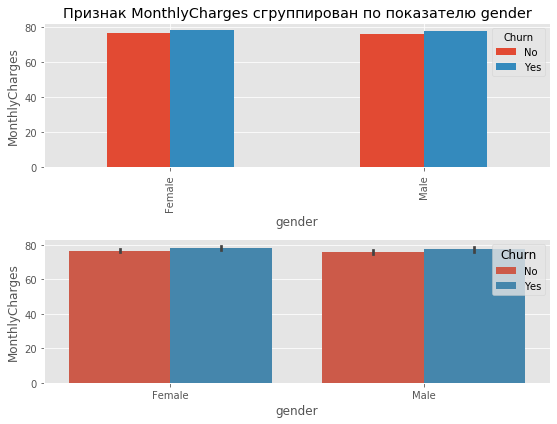

In [11]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) гендерного признака и (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'gender', 'MonthlyCharges', 'Churn')

In [12]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) гендерного признака и (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','gender','Churn')

Churn,No,Yes
gender,,
Female,76.723816,78.267101
Male,75.968287,77.570905


- **действующие клиенты (Churn==`No`)**: мужчины и женщины в среднем выплачивают одинаковую сумму ежемесячно
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: мужчины и женщины в среднем выплачивают одинаковую сумму ежемесячно

#### 2. Пенсионный возраст `SeniorCitizen`

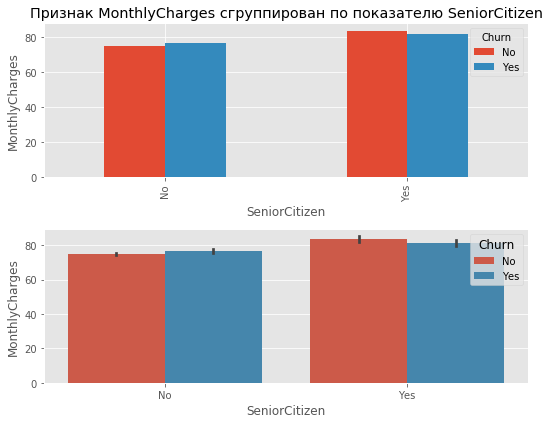

In [13]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) пенсионного/непенсионного возраста и (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'SeniorCitizen', 'MonthlyCharges', 'Churn')

In [14]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) пенсионного/непенсионного возраста и (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','SeniorCitizen','Churn')

Churn,No,Yes
SeniorCitizen,,
No,74.928135,76.661167
Yes,83.515832,81.358068


- **действующие клиенты (Churn==`No`)**: пенсионеры выплачивают на 8.6 у.е. больше чем пользователи более молодого возраста
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: пенсионеры выплачивают на 5 у.е. больше чем индивиды более молодого поколения

#### 3. Наличие супруги / супруга `Partner`

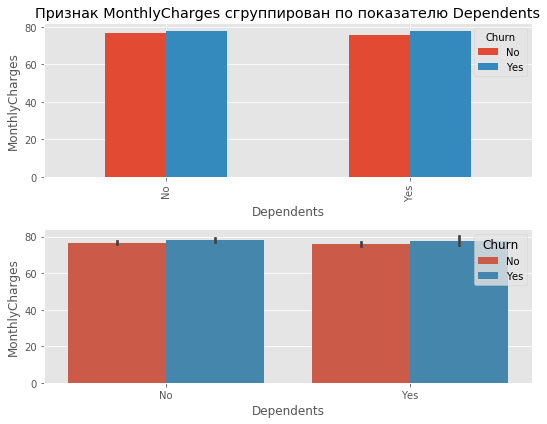

In [15]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) пенсионного/непенсионного возраста и (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'Dependents', 'MonthlyCharges', 'Churn')

In [16]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) пенсионного/непенсионного возраста и (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','Partner','Churn')

Churn,No,Yes
Partner,,
No,72.061572,75.303181
Yes,80.014600,82.485781


- **действующие клиенты (Churn==`No`)**: индивиды с супругой / супругом ежемесячно выплачивают на 8 у.е. больше чем пользователи без супруги / супруга
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: индивиды с супругой / супругом выплачивают на 7 у.е. больше чем индивиды без супруги / супруга

#### 4. Наличие детей `Dependents`

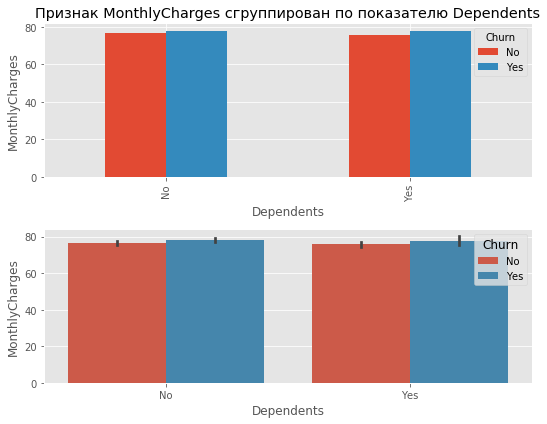

In [17]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) наличия / отсутствия детей и (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'Dependents', 'MonthlyCharges', 'Churn')

In [18]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) пенсионного/непенсионного возраста и (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','Dependents','Churn')

Churn,No,Yes
Dependents,,
No,76.534626,77.945953
Yes,75.913388,77.798826


- **действующие клиенты (Churn==`No`)**: индивиды с детьми ежемесячно выплачивают на 0.62 у.е. меньше чем пользователи без детей
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: индивиды с детьми выплачивают на 0.15 у.е. меньше чем индивиды без детей

#### 5. Продолжительность использования услуг в месяцах `tenure`

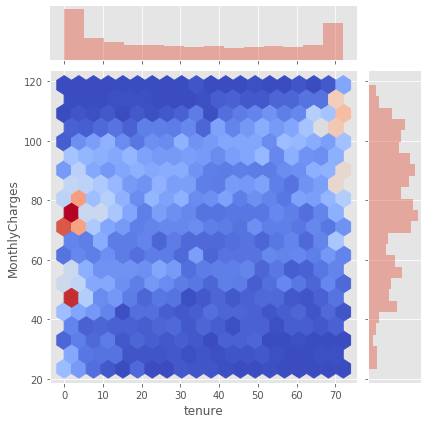

In [19]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) продолжительности ежемесячной подписки и (ii) статуса действующего/недействующего клиента
sns.jointplot(data=telco, x='tenure',y='MonthlyCharges', kind='hex', cmap='coolwarm')

- между продолжительность ежемесячной подписки и величиной ежемесячных выплат не наблюдается строгой зависимости

#### 6. Тип подключения интернета `InternetService`

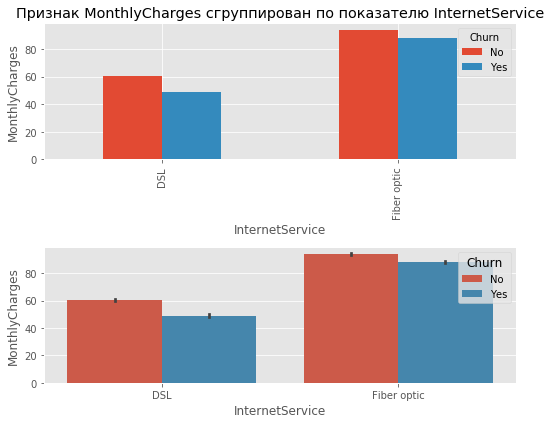

In [20]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) вида подключения интернета и (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'InternetService', 'MonthlyCharges', 'Churn')

In [21]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) пенсионного/непенсионного возраста и (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','InternetService','Churn')

Churn,No,Yes
InternetService,,
DSL,60.212105,49.083224
Fiber optic,93.932379,88.126484


- **действующие клиенты (Churn==`No`)**: индивиды с интернетом, подключенным через телефонную линию выплачивают на 33 у.е. меньше чем пользователи с интернетом, подключенным через оптоволоконный кабель
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: индивиды с интернетом, подключенным через телефонную линию выплачивают на 39 у.е. меньше чем пользователи с интернетом, подключенным через оптоволоконный кабель

#### 7. Блокировка небезопасных сайтов `OnlineSecurity`

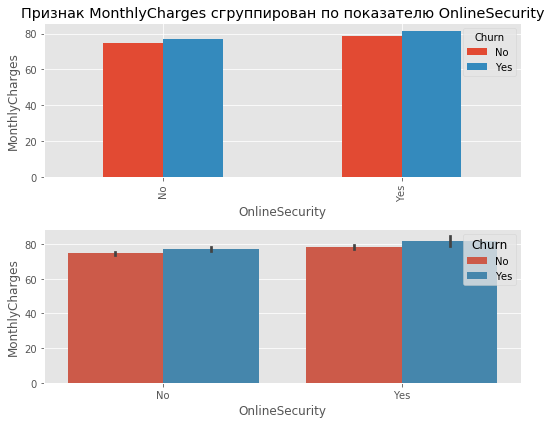

In [22]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) наличия/отсутствия блокировки небезопасных сайтов и
# (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'OnlineSecurity', 'MonthlyCharges', 'Churn')

In [23]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) наличия/отсутствия блокировки небезопасных сайтов и
# (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','OnlineSecurity','Churn')

Churn,No,Yes
OnlineSecurity,,
No,74.625233,77.181896
Yes,78.369432,81.581356


- **действующие клиенты (Churn==`No`)**: индивиды с наличием блокировки небезопасных сайтов выплачивают на 4 у.е. больше чем пользователи без блокировки небезопасных сайтов
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: индивиды с наличием блокировки небезопасных сайтов выплачивают на 4 у.е. больше чем пользователи без блокировки небезопасных сайтов

#### 8. Облачное хранилище файлов для резервного копирования данных `OnlineBackup`

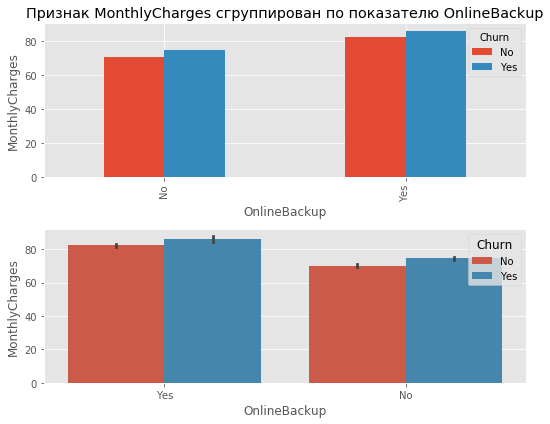

In [24]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) наличия/отсутствия облачного хранилища файлов для резервного копирования и
# (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'OnlineBackup', 'MonthlyCharges', 'Churn')

In [25]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) наличия/отсутствия облачного хранилища файлов для резервного копирования и
# (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','OnlineBackup','Churn')

Churn,No,Yes
OnlineBackup,,
No,70.226792,74.512449
Yes,82.292655,85.956788


- **действующие клиенты (Churn==`No`)**: индивиды с наличием блокировки небезопасных сайтов выплачивают на 12 у.е. больше чем пользователи без блокировки небезопасных сайтов
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: индивиды с наличием блокировки небезопасных сайтов выплачивают на 11 у.е. больше чем пользователи без блокировки небезопасных сайтов

#### 9. Антивирус `DeviceProtection`

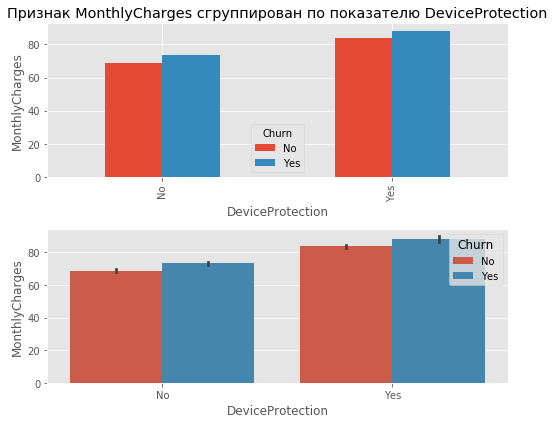

In [26]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) наличием/отсутствием антивируса и
# (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'DeviceProtection', 'MonthlyCharges', 'Churn')

In [27]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) наличия/отсутствия антивируса и
# (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','DeviceProtection','Churn')

Churn,No,Yes
DeviceProtection,,
No,68.873673,73.288398
Yes,83.837240,88.214679


- **действующие клиенты (Churn==`No`)**: индивиды с антивирусом выплачивают на 15 у.е. больше чем пользователи без антивируса
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: индивиды с антивирусом выплачивают на 5 у.е. больше чем пользователи без антивируса

#### 10. Линия технической поддержки `TechSupport`

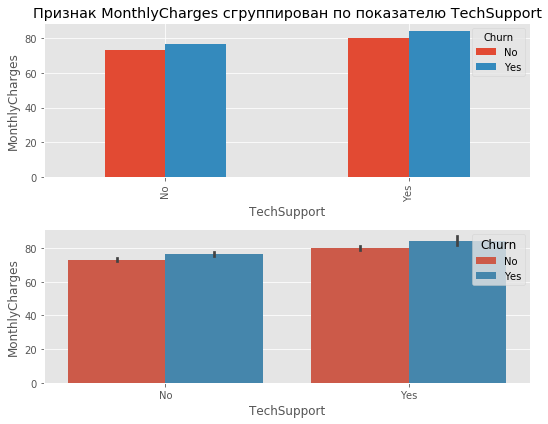

In [28]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) наличия/отсутствия линии технической поддержки и
# (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'TechSupport', 'MonthlyCharges', 'Churn')

In [29]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) наличия/отсутствия линии технической поддержки и
# (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','TechSupport','Churn')

Churn,No,Yes
TechSupport,,
No,73.176986,76.562794
Yes,80.040802,84.256290


- **действующие клиенты (Churn==`No`)**: индивиды с наличием линии технической поддержки выплачивают на 7 у.е. больше чем пользователи без линии технической поддержки
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: индивиды с наличием линии технической поддержки выплачивают на 8 у.е. больше чем пользователи без линии технической поддержки

#### 11. Оплата в электронном формате `PaperlessBilling`

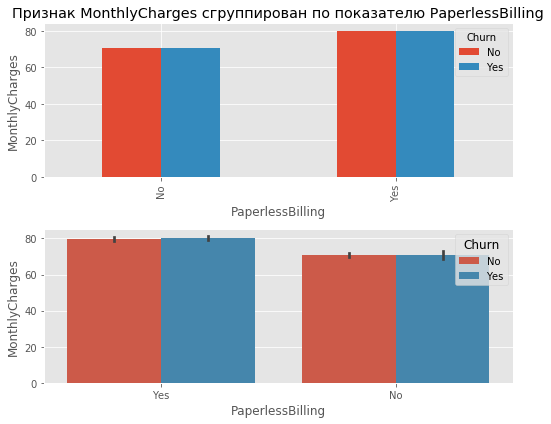

In [30]:
# визуализация величины ежемесячных выплат 
# в разрезе (i) оплаты в электронном формате и
# (ii) статуса действующего/недействующего клиента
bar_plt_sns(telco, 'PaperlessBilling', 'MonthlyCharges', 'Churn')

In [31]:
# вычисление среднего значения ежемесячных выплат
# в разрезе (i) оплаты в электронном формате и
# (ii) статуса действующего/недействующего клиента
pivot(telco,'MonthlyCharges','PaperlessBilling','Churn')

Churn,No,Yes
PaperlessBilling,,
No,70.650753,70.803015
Yes,79.693008,80.007106


- **действующие клиенты (Churn==`No`)**: индивиды с электронной оплатой услуг выплачивают на 9 у.е. больше чем пользователи с бумажной оплатой услуг
- **индивиды, которые перешли на услуги другой компании (Churn==`Yes`)**: индивиды с электронной оплатой услуг выплачивают на 10 у.е. больше чем пользователи с бумажной оплатой услуг

#### 12. Размер ежемесячных выплат `MonthlyCharges`

In [32]:
# определим функцию, которая строит плотностную гистограмму заданного признака feature
def plot_hist(dataframe, feature):
    # Создадим фигура для построения диаграммы
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
    # Построим плотностную гистограмму продолжительности срока действия договора для недействующих пользователей
    dataframe.loc[dataframe['Churn']=='Yes',feature].plot(ax=ax, kind='hist', density=True, histtype='step',
                                                  color='green', label='inactive', lw=5)
    # Построим плотностную гистограмму продолжительности срока действия договора для действующих пользователей
    dataframe.loc[dataframe['Churn']=='No', feature].plot(ax=ax, kind='hist', density=True, histtype='step',
                                                   color='red', label='active', lw=5)
    # Вывод легенды
    plt.legend()

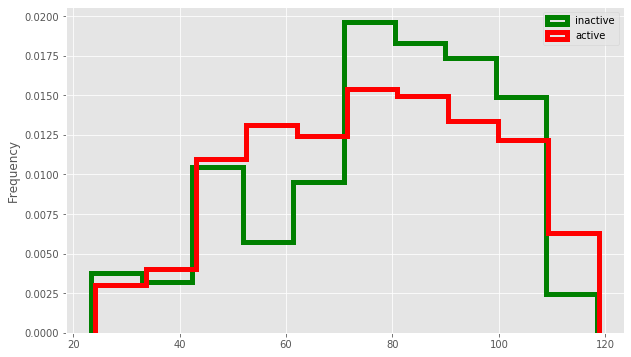

In [33]:
# построим плотностную гистограмму распределения ежемесячных выплат
# действующих и недействующих клиентов
plot_hist(telco, 'MonthlyCharges')

- индивиды, которые перешли на услуги другой компании более вероятно ежемесячно выплачивали от 70 до 110 у.е. чем действующие клиенты

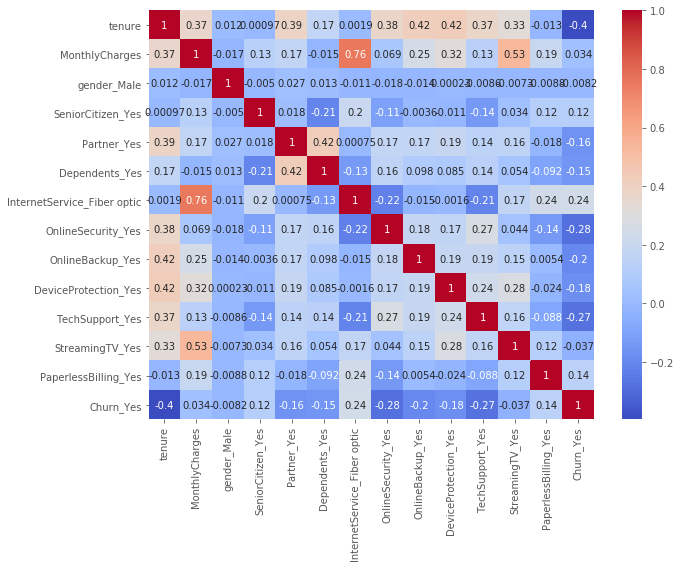

In [34]:
# вычисление корреляционной матрицы. Прежде, преобразуем переменные со строковым форматом в бинарный формат
corr_mat = pd.get_dummies(telco, drop_first=True).corr()
# создание фигуры для построения диаграммы
plt.figure(figsize=(10,8))
# визуализация корреляционной матрицы посредством тепловой диаграммы
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.tight_layout()

In [35]:
# определим корреляцию детерминант с вероятностью оттока клиентов
corr_mat['Churn_Yes'].sort_values()

tenure                        -0.396500
OnlineSecurity_Yes            -0.280816
TechSupport_Yes               -0.274422
OnlineBackup_Yes              -0.196061
DeviceProtection_Yes          -0.177125
Partner_Yes                   -0.161909
Dependents_Yes                -0.148783
StreamingTV_Yes               -0.037057
gender_Male                   -0.008226
MonthlyCharges                 0.033560
SeniorCitizen_Yes              0.121247
PaperlessBilling_Yes           0.143228
InternetService_Fiber optic    0.244319
Churn_Yes                      1.000000
Name: Churn_Yes, dtype: float64

### Выводы

Вероятность оттока клиентов сокращается по мере:
- большей продолжительности использования услуг телекоммуникационной компании
- наличия блокировки небезопасных сайтов
- наличия линии технической поддержки
- установки облачного хранилища файлов для резервного копирования данных
- установки антивируса
- наличия супруги / супруга
- наличия детей
- установки стримингового телевидения

Вероятность оттока клиентов повышается за счет:

- достижения пенсионного возраста
- оплаты бумажным способом
- установки интернета опто-волоконным кабелем